In [115]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [116]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape, t_u

(torch.Size([11, 1]),
 tensor([[35.7000],
         [55.9000],
         [58.2000],
         [81.9000],
         [56.3000],
         [48.9000],
         [33.9000],
         [21.8000],
         [48.4000],
         [60.4000],
         [68.4000]]))

In [117]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 2,  9,  6,  4, 10,  7,  3,  1,  5]), tensor([8, 0]))

In [118]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [119]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val), t_un_val, t_un_val.shape

(tensor([[-4.3057],
         [-3.1012]], grad_fn=<AddmmBackward0>),
 tensor([[4.8400],
         [3.5700]]),
 torch.Size([2, 1]))

In [120]:
linear_model.weight

Parameter containing:
tensor([[-0.9484]], requires_grad=True)

In [121]:
linear_model.bias

Parameter containing:
tensor([0.2845], requires_grad=True)

In [122]:
x = torch.ones(1)
linear_model(x), x, x.shape

(tensor([-0.6639], grad_fn=<AddBackward0>), tensor([1.]), torch.Size([1]))

In [123]:
x = torch.ones(10, 1)
linear_model(x), x, x.shape

(tensor([[-0.6639],
         [-0.6639],
         [-0.6639],
         [-0.6639],
         [-0.6639],
         [-0.6639],
         [-0.6639],
         [-0.6639],
         [-0.6639],
         [-0.6639]], grad_fn=<AddmmBackward0>),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]),
 torch.Size([10, 1]))

In [124]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [125]:
linear_model.parameters()
for i in linear_model.parameters():
    print(i)

Parameter containing:
tensor([[0.4600]], requires_grad=True)
Parameter containing:
tensor([0.3084], requires_grad=True)


In [126]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.4600]], requires_grad=True),
 Parameter containing:
 tensor([0.3084], requires_grad=True)]

In [127]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [128]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 117.6538, Validation loss 5.3744
Epoch 1000, Training loss 3.1306, Validation loss 12.5270
Epoch 2000, Training loss 2.3351, Validation loss 8.1554
Epoch 3000, Training loss 2.3089, Validation loss 7.4890

Parameter containing:
tensor([[5.1931]], requires_grad=True)
Parameter containing:
tensor([-15.9060], requires_grad=True)


In [129]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 205.9073, Validation loss 15.6617
Epoch 1000, Training loss 3.0260, Validation loss 12.1324
Epoch 2000, Training loss 2.3316, Validation loss 8.1005
Epoch 3000, Training loss 2.3088, Validation loss 7.4796

Parameter containing:
tensor([[5.1943]], requires_grad=True)
Parameter containing:
tensor([-15.9126], requires_grad=True)


In [130]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [131]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [132]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [137]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=2, bias=True)
)

In [138]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([2, 8])
output_linear.bias torch.Size([2])


In [139]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.1602,  0.2309], requires_grad=True)

In [140]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([9, 1])) that is different to the input size (torch.Size([9, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training loss 226.7624, Validation loss 18.9414
Epoch 1000, Training loss 9.7742, Validation loss 8.8686
Epoch 2000, Training loss 4.0557, Validation loss 4.7770
Epoch 3000, Training loss 3.2704, Validation loss 2.1087
Epoch 4000, Training loss 2.1583, Validation loss 2.8065
Epoch 5000, Training loss 1.6881, Validation loss 3.7434
output tensor([[8.2656, 8.2290],
        [2.7036, 2.6837]], grad_fn=<AddmmBackward0>)
answer tensor([[6.0000],
        [0.5000]])
hidden tensor([[-0.2683],
        [ 9.0189],
        [-7.3616],
        [ 9.0033],
        [-8.0715],
        [ 0.1945],
        [ 0.3040],
        [ 0.2801]])


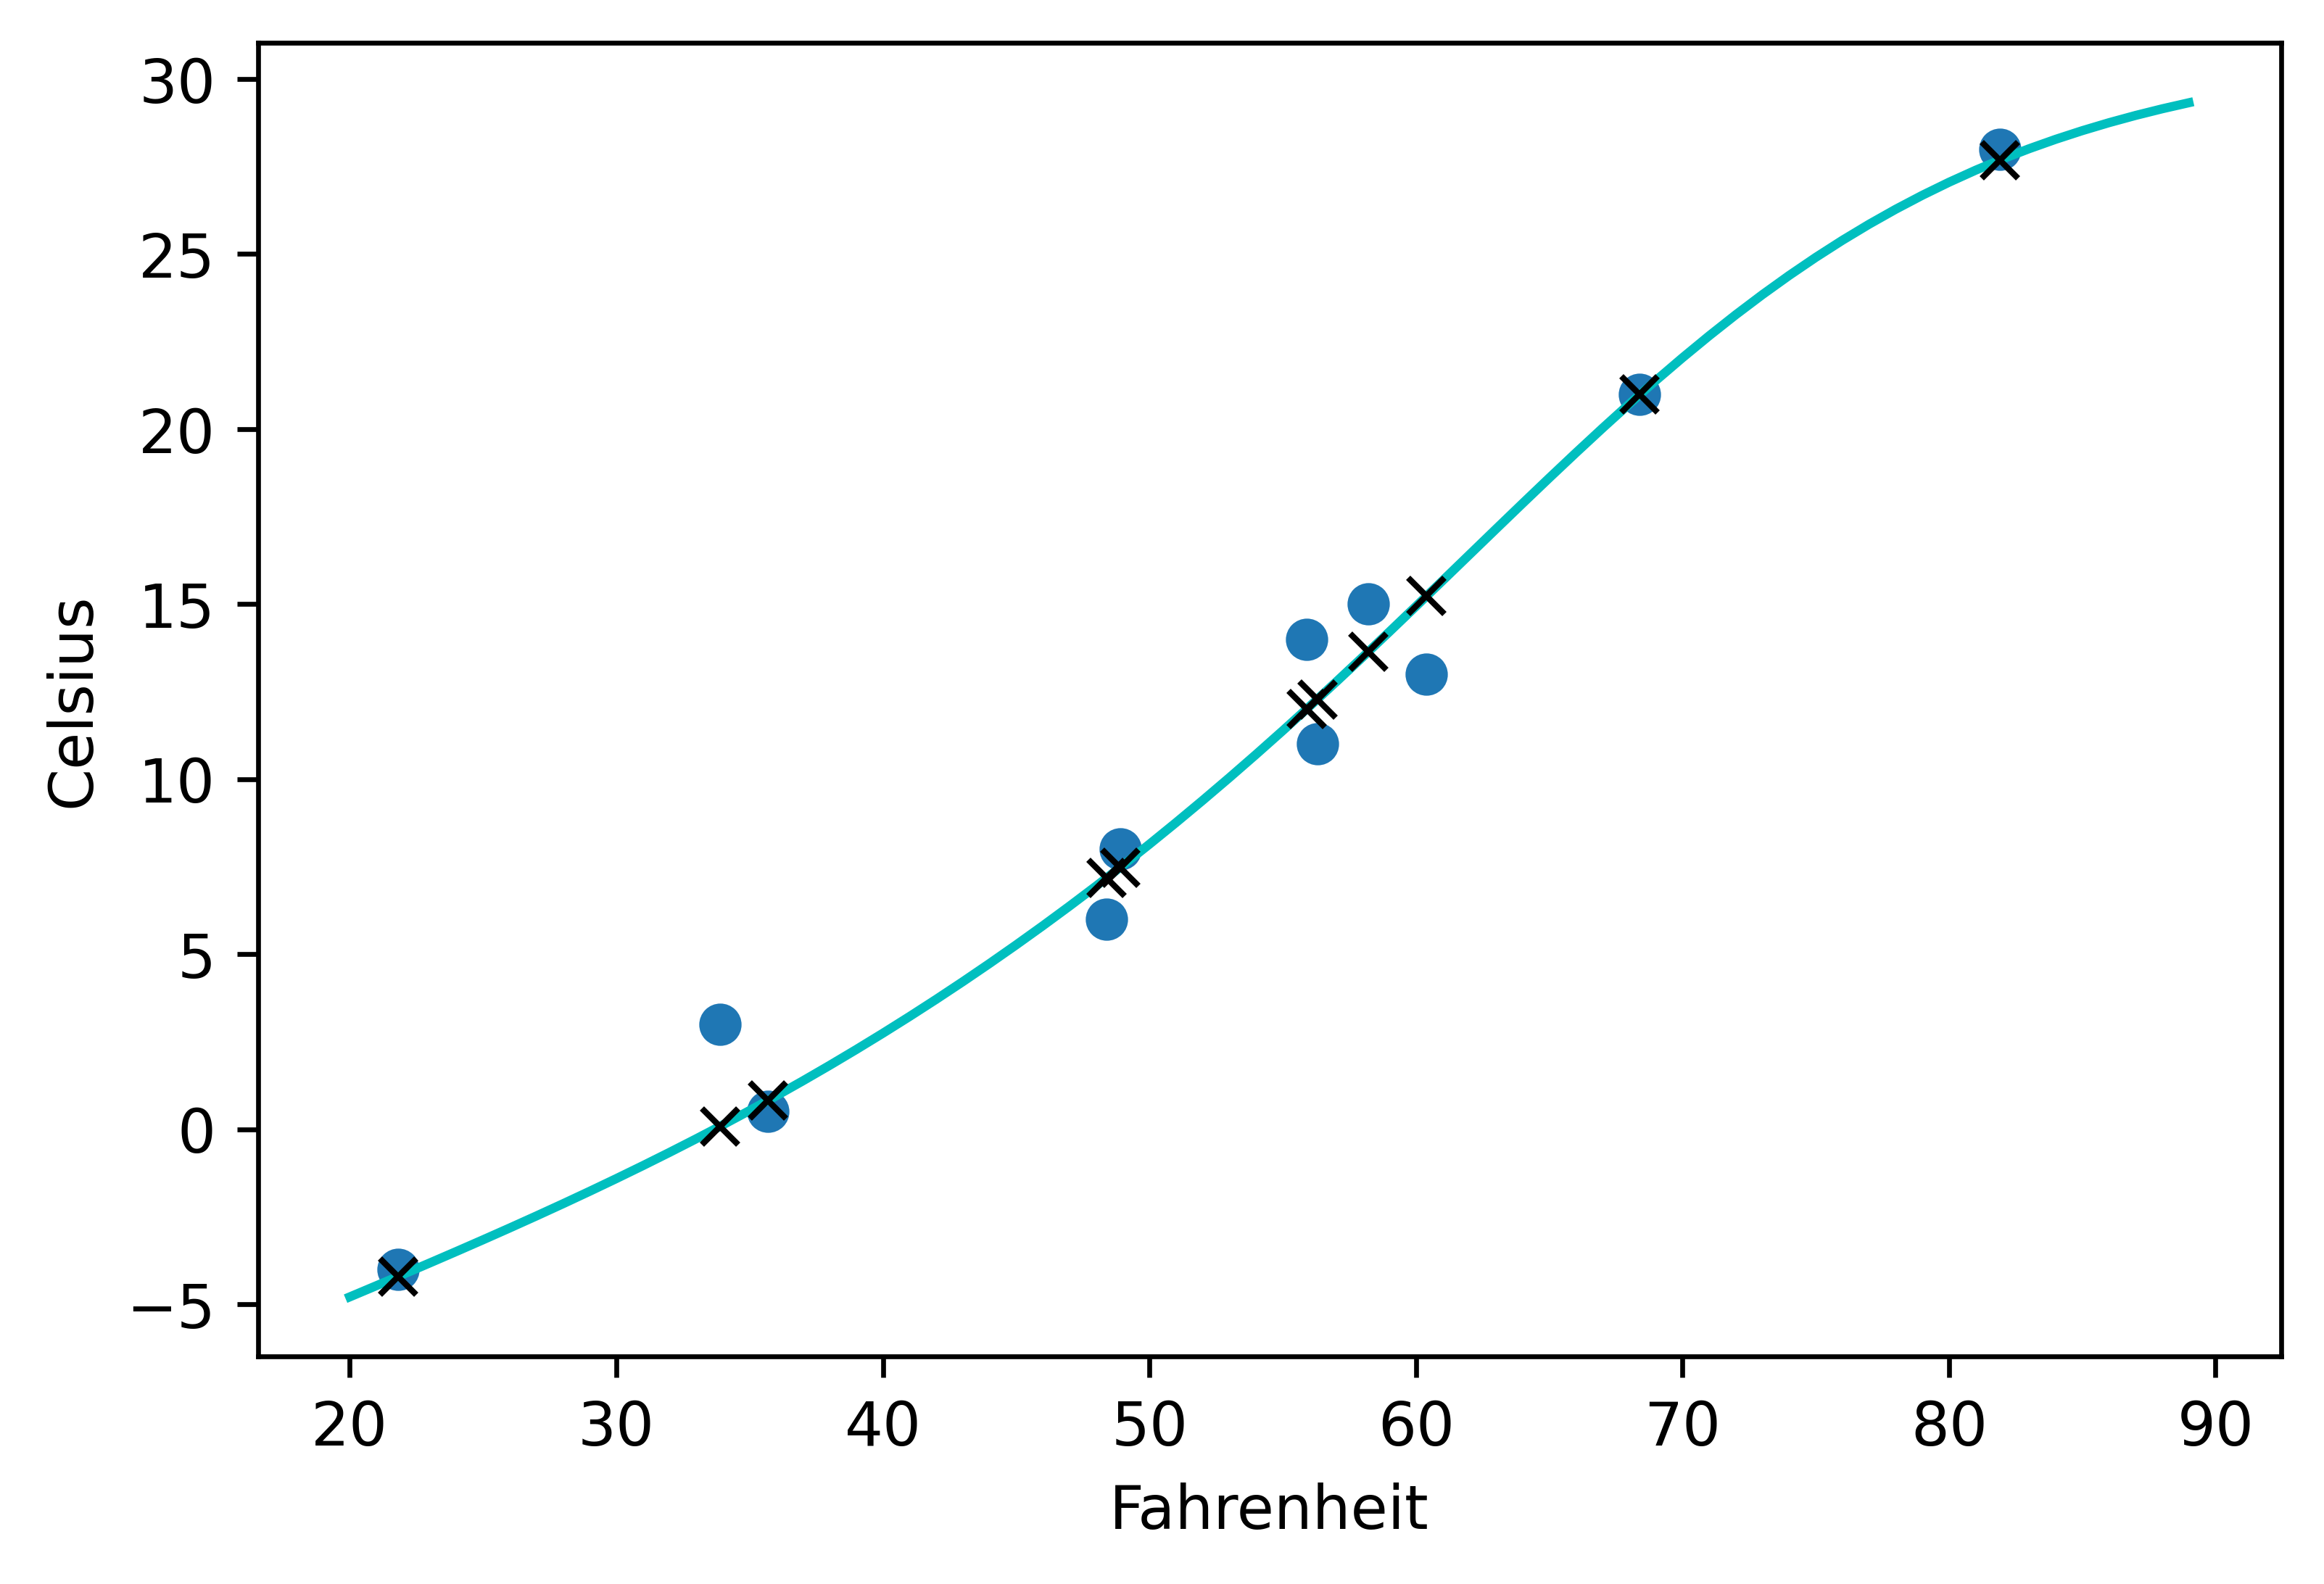

In [77]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 173.9504, Validation loss 219.2148
Epoch 1000, Training loss 56.8923, Validation loss 64.9354
Epoch 2000, Training loss 39.7663, Validation loss 42.1159
Epoch 3000, Training loss 26.6801, Validation loss 26.0251
Epoch 4000, Training loss 16.9483, Validation loss 15.1925
Epoch 5000, Training loss 10.8017, Validation loss 9.4915


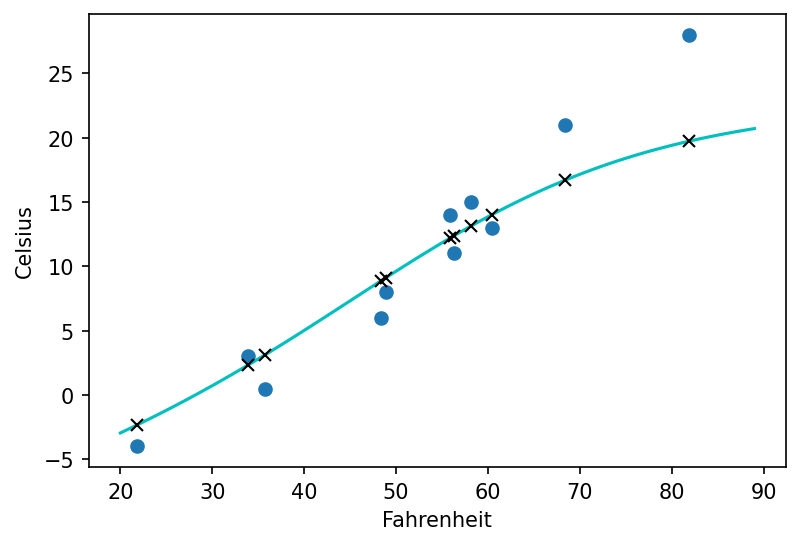

In [78]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
